<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/01_EXERCICE_MNIST-04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the MNIST dataset in Keras**

In [39]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**1.** Find the shape of the tensor for train_images.

**2.** What each dimension in the shape represent?

**3.** Write code that returns a pixel of your choosing from the first image.

**4.** What does the value signify?

**5.** What is the ground truth of this image?

**6.** Output the values of all the pixels of this image.

**7.** Try to visualise the image using **matplotlib**.

**8.** Make sure that the number of labels matches the number of images in the training set.

1. **Shape**

In [2]:
train_images.shape

(60000, 28, 28)

2. **Dimensions**
  1.   Anzahl Bilder
  2.   Pixel X
  3.   Pixel Y





3. **Pixel from the first image**

In [8]:
train_images[0, 0, 0]

0

4. **What does the value signify?**
Grauwert von 0 bis 255

5. & 6. **What is the groud truth?**
Label, Wert der angegeben wurde.

In [10]:
train_labels[0]

5

7. **Visualize**

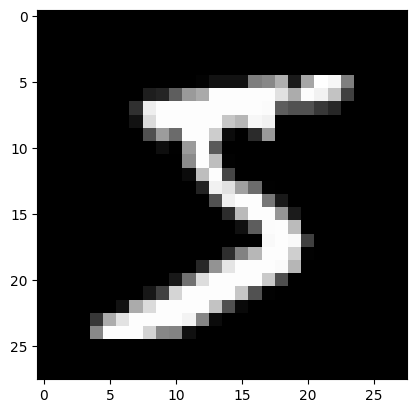

In [12]:
from matplotlib import pyplot
pyplot.imshow(train_images[0], cmap='gray', vmin=0, vmax=255)


8. **Match?** => yes probably

**The network architecture**

**9.** Using the example in the slides create a sequential model with two dense layers, one hidden and one for output.
Make the output size of the hidden layer 512 and carrefully choose the activation functions and the output size of the last layer.

In [40]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])


**The compilation step**

**10.** What is the role of the optimizer and the loss function?  How do we use the metrics during training?

### ???

In [41]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In order to pass this dataset to our NN, we need to:
1. Reshape each image from 2D to 1D (ie. store all the pixels values in a
single list).
2. Normalize all pixel values (that are currently between 0 and 255) to floats between 0 and 1 (that are easier for the network to handle).


In [42]:
# train_images = train_images.reshape((60000, 28 * 28)) => flatten reshape does that
train_images = train_images.astype("float32") / 255
# test_images = test_images.reshape((10000, 28 * 28)) => flatten reshape does that
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [43]:
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 [==============================] - 6s 4ms/step - loss: 0.2918 - accuracy: 0.9155 - val_loss: 0.1515 - val_accuracy: 0.9562
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.1228 - accuracy: 0.9644 - val_loss: 0.1096 - val_accuracy: 0.9682
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9768 - val_loss: 0.0971 - val_accuracy: 0.9713
Epoch 4/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.0848 - val_accuracy: 0.9736
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.0795 - val_accuracy: 0.9755


**11.** Train the model for 5 epochs and batch-size 128




**Using the model to make predictions**

**12.** Make predicion for the first 10 images of the test_images set.

**13.** Check the prediction of the first one.

In [53]:
predictions = model.predict(test_images[:10])
#print(predictions)
# argmax = max value
print(np.argmax(predictions, axis=1))

#pyplot.imshow(test_images[1], cmap='gray', vmin=0, vmax=1)


1/1 [==============================] - 0s 17ms/step
[7 2 1 0 4 1 4 9 5 9]


**14.** Make sure that your prediction is correct.

**15.** Visualize the test image.

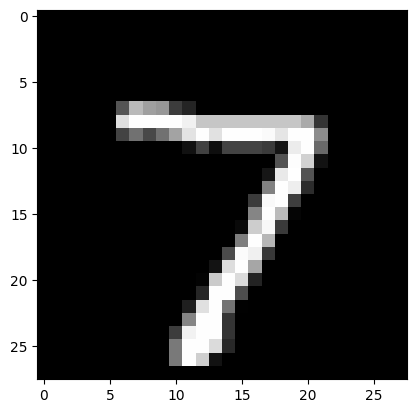

In [58]:
pyplot.imshow(test_images[0], cmap='gray', vmin=0, vmax=1)

**Evaluating the model on new data**

**16.** Evaluate the model using test_images and test_labels sets.

In [56]:
test_score = model.evaluate(test_images, test_labels)
print(test_score)

313/313 [==============================] - 1s 3ms/step - loss: 0.0658 - accuracy: 0.9801
[0.06581088900566101, 0.9800999760627747]


**17.** Retrain with : (a) different batch-sizes, (b) different number of epochs, (c) smaller training sets (100/1000/6000/10000) and combination of these 3.
Also, create different models with (d) more layers, (e) smaller layers and train them for different scenarios from above (batch-size, epochs and size of training set).


**18**. What do you observe?

**19.** Plot the results for each of your experiments (you will use the History object). Example:

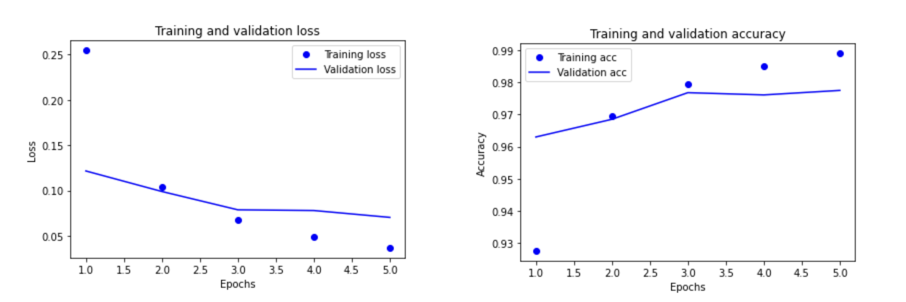



**20**. Repeate exercices and questions 1 to 19 for the mnist_fashion dataset :
tensorflow.keras.datasets.fashion_mnist
